## Testing K Means models for clustering score

This notebook has the objective of test and analyze the different metholodologies of K means application with the help of the evaluation by plotting the clusters and measuring the Sillhouette coefficient

## Visualizing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation,KMeans
from sklearn import metrics
import random
import datetime
from itertools import cycle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestCentroid


In [2]:
random.seed(10)

In [3]:
## Import csv
dataset = pd.read_csv('hackathon_ods.csv')

In [4]:
dataset.head()

,Carimbo de data/hora,Pseudônimo - Um nome qualquer que a gente não consiga ligar diretamente à você :),Qual a sua área na empresa?,Sua faixa etaria,Qual gênero você se identifica?,Você se identifica com o sexo que foi lhe atribuído ao nascimento?,Qual cor/etnia você se declara?,Qual a sua orientação sexual?,Você cursou a maior parte do seu ensino fundamental / ensino médio em qual tipo de escola?,Você é ou já foi uma pessoa de vulnerabilidade econômica?,Você possui algum tipo de deficiência?,Qual a sua regionalidade?
0,2022/07/10 10:46:52 AM GMT-3,Urso Azul,Marketing,NaN,Feminino,Sim,Branco,Bissexual ou biafetivo,Escola privada,Não,Não,Estrangeiro
1,2022/07/10 10:49:04 AM GMT-3,Besouro Supimpa,Engenharia,NaN,Masculino,Sim,Branco,Heterossexual ou heteroafetiva,Escola pública,Não,Não,Sul
2,2022/07/10 10:49:07 AM GMT-3,Jacinto Cume,Engenharia,NaN,Masculino,Sim,Amarelo,Prefiro não dizer,Escola privada,Não,Não,Sudeste
3,2022/07/10 10:49:57 AM GMT-3,Jessica,Negócios,NaN,Masculino,Sim,Branco,Heterossexual ou heteroafetiva,Escola privada,Não,Não,Sudeste
4,2022/07/10 10:51:23 AM GMT-3,Kéka,Marketing,NaN,Feminino,Sim,Branco,Heterossexual ou heteroafetiva,Escola pública,Não,Não,Sudeste


In [6]:
dataset.columns = ['Hora','Nome', 'Area', 'Etaria', 'Genero', 'Sexo', 'Etnia', 'OrientacaoSexual', 'EscolaPublica', 'Vulnerabilidade', 'PCD', 'Regiao']

## Filtering to the 

In [8]:
def string_to_cat(df, column):
    types = []
    for i in list(df[column]):
        if i not in types:
            types.append(i)
    for i in types:
        df[[column]] = df[[column]].replace(i, types.index(i))
        
    return df.copy()
        

In [11]:
## Filtering the desired columns
df_of = dataset[['Nome', 'Area', 'Genero', 'Sexo', 'Etnia', 'OrientacaoSexual', 'EscolaPublica', 'Vulnerabilidade', 'PCD', 'Regiao']]
df = dataset[['Area', 'Genero', 'Sexo', 'Etnia', 'OrientacaoSexual', 'EscolaPublica', 'Vulnerabilidade', 'PCD', 'Regiao']]

In [12]:
df = string_to_cat(df, 'Area')
df = string_to_cat(df, 'Genero')
df = string_to_cat(df, 'Sexo')
df = string_to_cat(df, 'Etnia')
df = string_to_cat(df, 'OrientacaoSexual')
df = string_to_cat(df, 'EscolaPublica')
df = string_to_cat(df, 'Vulnerabilidade')
df = string_to_cat(df, 'PCD')
df = string_to_cat(df, 'Regiao')

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
df.head()

,Area,Genero,Sexo,Etnia,OrientacaoSexual,EscolaPublica,Vulnerabilidade,PCD,Regiao
0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,0,1
2,1,1,0,1,2,0,0,0,2
3,2,1,0,0,1,0,0,0,2
4,0,0,0,0,1,1,0,0,2


In [15]:
# Verifying the null values
df.isnull().sum()

Area                0
Genero              0
Sexo                0
Etnia               0
OrientacaoSexual    0
EscolaPublica       0
Vulnerabilidade     0
PCD                 0
Regiao              0
dtype: int64

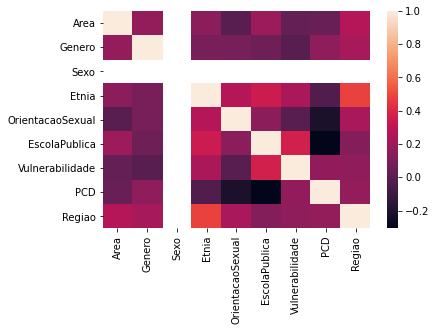

In [16]:
# Ploting correlations
corr = df.corr()
sns.heatmap(corr)
plt.show()

## Applying Affinity Propagation

In [34]:
reduced_data = PCA(n_components=2).fit_transform(df)

In [35]:
## Applying Affinity Propagation
af = AffinityPropagation().fit(reduced_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
labels_true = [0, 0, 1, 1]
n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(labels_true, labels)
# )
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(reduced_data, labels, metric="sqeuclidean")
)

Estimated number of clusters: 7
Silhouette Coefficient: 0.708


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [36]:
clusters_af = []
for c in cluster_centers_indices:
    clusters_af.append(reduced_data[c])
    

In [37]:
clusters_af

[array([-4.16914631,  3.35796118]),
 array([-5.48839989, -1.11293081]),
 array([ 8.45262559, -2.44882482]),
 array([ 0.61143724, -1.05321665]),
 array([-2.43968053, -0.93397626]),
 array([11.69678073,  0.61941892]),
 array([2.87370043, 2.56593023])]

## Elbow method

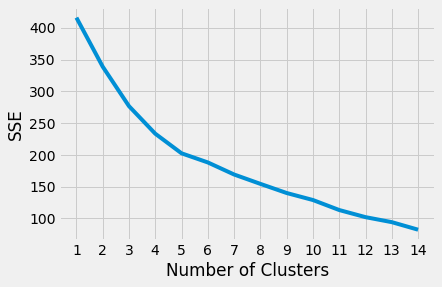

In [38]:
sse = []
transformer = StandardScaler().fit(df)
df2 = transformer.transform(df)
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

 ## KMeans

Silhouetter Score: 0.504


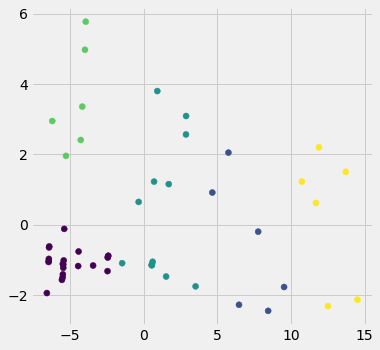

In [39]:
plt.figure(figsize=(12, 12))

km = KMeans(n_clusters=5)
y_pred = km.fit_predict(reduced_data)

X = reduced_data

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)


score = metrics.silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

# Anisotropicly distributed data


plt.show()

## Kmeans with Scalator

Silhouetter Score: 0.531


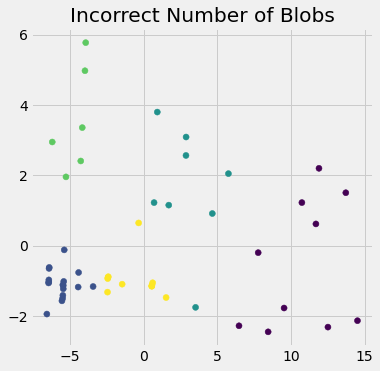

In [40]:
plt.figure(figsize=(12, 12))
transformer = StandardScaler().fit(df)
df2 = transformer.transform(df)

new_reduced_data = PCA(n_components=2).fit_transform(df)


km = KMeans(n_clusters=5)
y_pred = km.fit_predict(new_reduced_data)

X = reduced_data
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


# Anisotropicly distributed data


plt.show()

## Getting the closest five elements

In [41]:
df

,Area,Genero,Sexo,Etnia,OrientacaoSexual,EscolaPublica,Vulnerabilidade,PCD,Regiao
0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,0,1
2,1,1,0,1,2,0,0,0,2
3,2,1,0,0,1,0,0,0,2
4,0,0,0,0,1,1,0,0,2
5,3,1,0,0,1,1,0,0,2
6,4,0,0,0,0,0,1,1,3
7,5,0,0,0,1,0,2,0,2
8,6,1,0,2,1,0,2,2,2
9,7,1,0,3,1,1,0,0,2


In [43]:
point = [[-100, -10]]
dist_centers = []
for c in clusters_af:
    d = np.linalg.norm(point - c)
    dist_centers.append(d)
    
m = min(dist_centers)
cluster = dist_centers.index(m)


closest_centers = []

for i in reduced_data:
    dist_centers = []
    for c in clusters_af:
        d = np.linalg.norm(i - c)
        dist_centers.append(d)
    m = min(dist_centers)
    nearest_cluster = dist_centers.index(m)
    closest_centers.append(nearest_cluster)
    
dists_from_point = []
for i in reduced_data:
    d = np.linalg.norm(i - point)
    dists_from_point.append(d)
    

index_sorted = sorted(range(len(dists_from_point)), key=lambda k: dists_from_point[k])

five_closest_points = []

for i in index_sorted:
    if len(five_closest_points) < 5 and closest_centers[i] == cluster:
        five_closest_points.append(df_of.iloc[i][["Nome"]])


In [44]:
five_closest_points

[Nome    Urso Azul
 Name: 0, dtype: object,
 Nome    Mari
 Name: 12, dtype: object,
 Nome    Rogério Ceni
 Name: 36, dtype: object,
 Nome    Kéka
 Name: 4, dtype: object,
 Nome    Clarice
 Name: 10, dtype: object]